a280_NNHonly

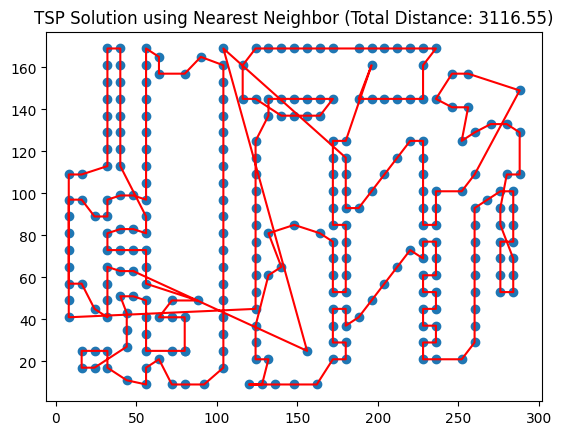

Time taken to render: 0.29608964920043945 seconds




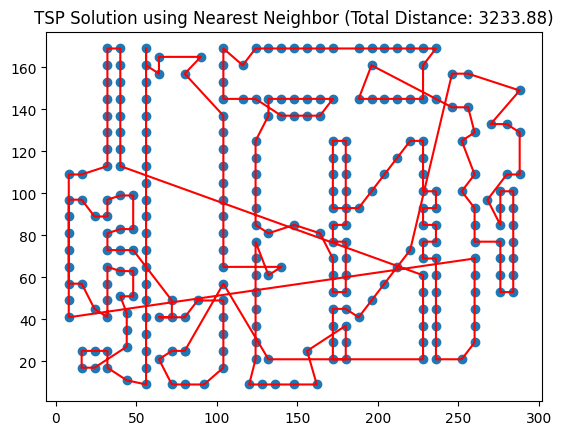

Time taken to render: 0.31626057624816895 seconds




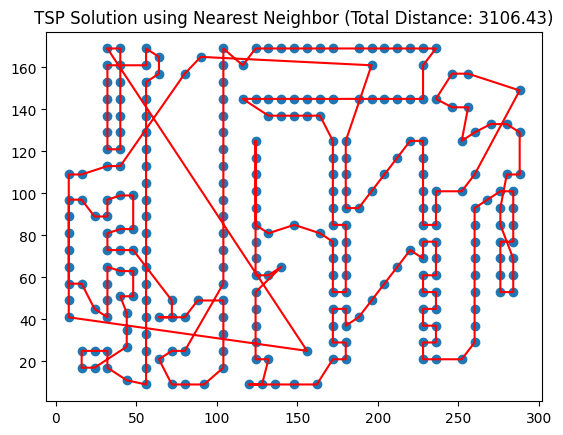

Time taken to render: 0.31800222396850586 seconds




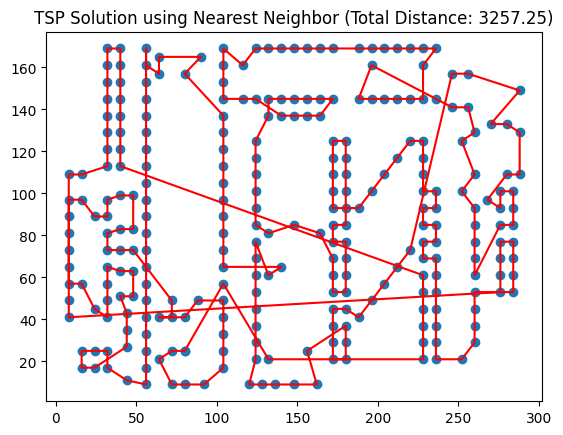

Time taken to render: 0.30831122398376465 seconds




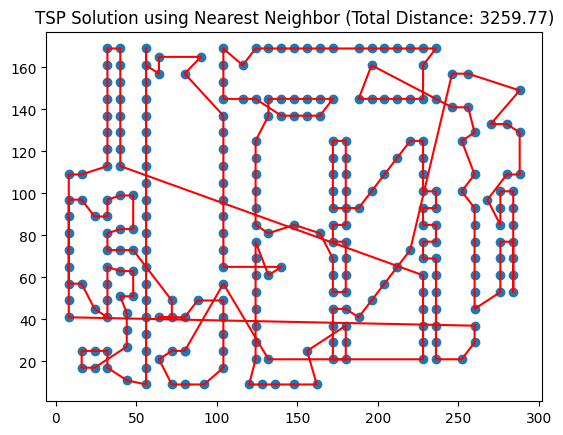

Time taken to render: 0.313678503036499 seconds




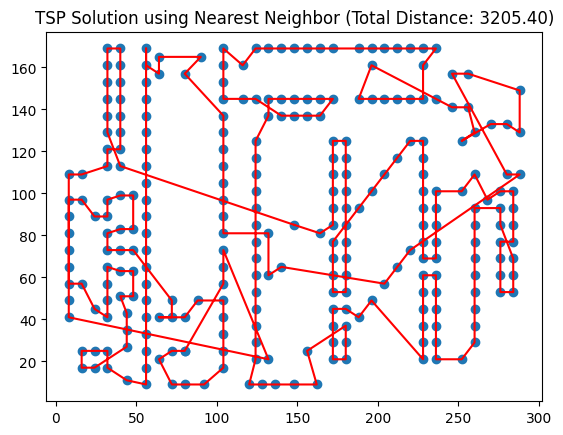

Time taken to render: 0.3243675231933594 seconds




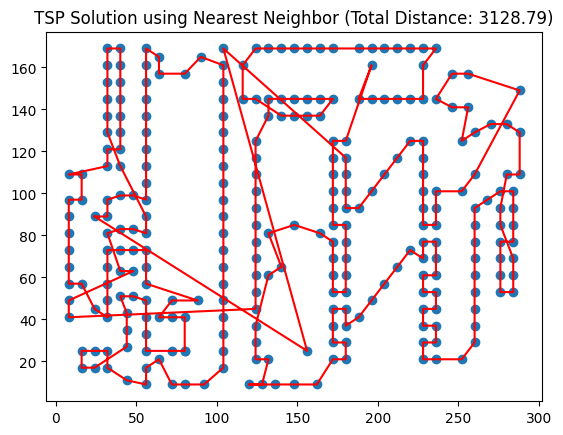

Time taken to render: 0.34166407585144043 seconds




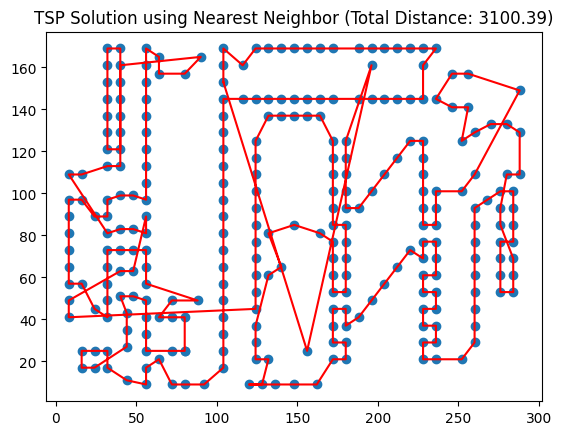

Time taken to render: 0.3242323398590088 seconds




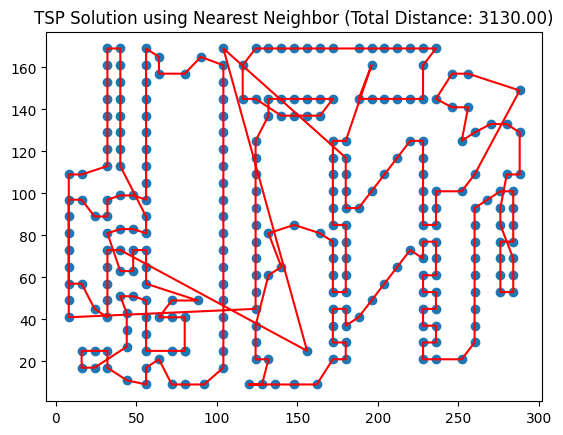

Time taken to render: 0.3329925537109375 seconds




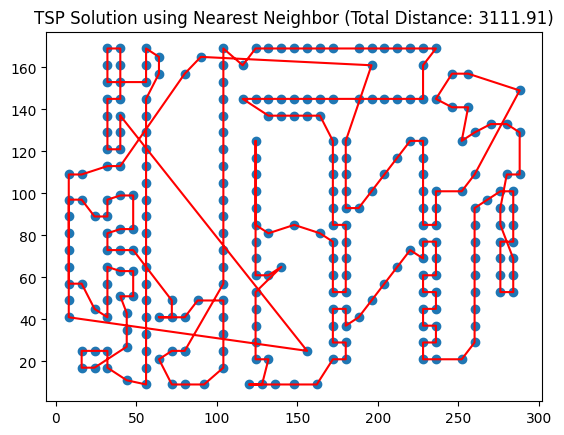

Time taken to render: 0.3151395320892334 seconds


Average Tour Length: 3165.037869341907
Average Time taken to render: 0.31907382011413576 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.search(line)
            if match:
                coordinates.append((int(match.group(1)), int(match.group(2))))

    return coordinates


# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


a280_NNHwith2OPT

Iteration 258: Improved total distance to 3074.49
Iteration 281: Improved total distance to 3068.82
Iteration 357: Improved total distance to 3063.55
Iteration 359: Improved total distance to 3062.33
Iteration 1023: Improved total distance to 3057.64
Iteration 1024: Improved total distance to 3057.64
Iteration 1298: Improved total distance to 3046.33
Iteration 1844: Improved total distance to 3046.33
Iteration 2115: Improved total distance to 3041.64
Iteration 2116: Improved total distance to 3041.64
Iteration 2386: Improved total distance to 3030.33
Iteration 3777: Improved total distance to 3029.87
Iteration 5380: Improved total distance to 3028.88
Iteration 13394: Improved total distance to 3023.70
Iteration 14066: Improved total distance to 3009.25
Iteration 15563: Improved total distance to 3005.36
Iteration 16845: Improved total distance to 3002.68
Iteration 17053: Improved total distance to 3001.26
Iteration 23217: Improved total distance to 2993.71
Iteration 23909: Improved tot

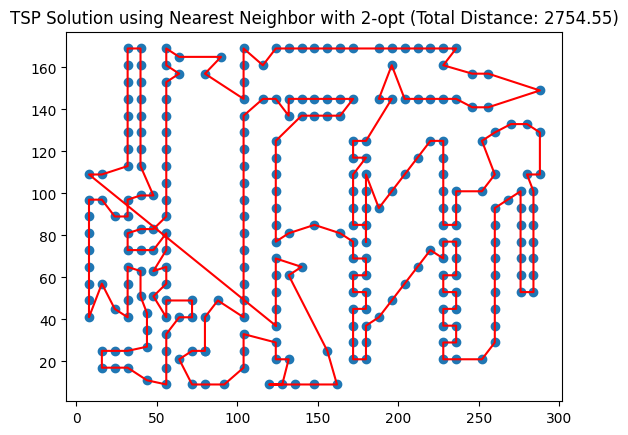

Time taken to render: 589.4479598999023 seconds


Iteration 6916: Improved total distance to 3089.35
Iteration 7412: Improved total distance to 3079.46
Iteration 11094: Improved total distance to 3072.93
Iteration 17524: Improved total distance to 3072.02
Iteration 22136: Improved total distance to 3067.33
Iteration 23240: Improved total distance to 3066.98
Iteration 25254: Improved total distance to 3062.43
Iteration 28055: Improved total distance to 3053.83
Iteration 29742: Improved total distance to 3052.61
Iteration 31380: Improved total distance to 3048.14
Iteration 31409: Improved total distance to 3046.81
Iteration 31499: Improved total distance to 3042.24
Iteration 31882: Improved total distance to 3038.64
Iteration 32113: Improved total distance to 3031.68
Iteration 33833: Improved total distance to 3025.56
Iteration 34907: Improved total distance to 3019.81
Iteration 35360: Improved total distance to 3006.00
Iteration 35378: Improved total distance to 2991.76
Iteration 35390:

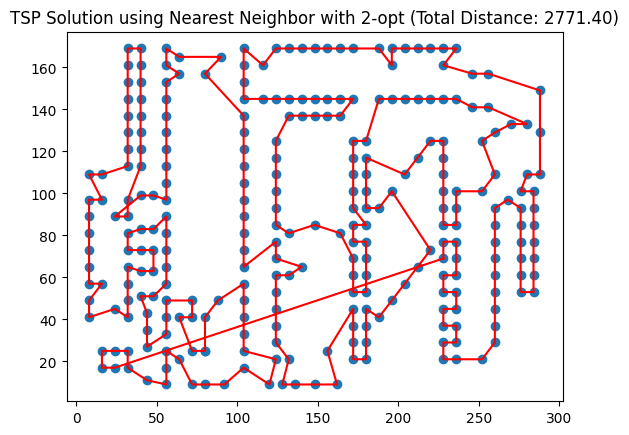

Time taken to render: 469.36729526519775 seconds


Average Tour Length: 2762.9741131816054
Average Time taken to render: 529.40762758255 seconds


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.search(line)
            if match:
                coordinates.append((int(match.group(1)), int(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

# Rerun TSP solving process 5 times
for i in range(2):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


a280_NNHwith3OPT

Iteration 811564: Improved total distance to 3100.64
Iteration 1187224: Improved total distance to 3094.88
Iteration 1188026: Improved total distance to 3083.74
Iteration 1434998: Improved total distance to 3079.46
Iteration 2210922: Improved total distance to 3072.97
Iteration 2210923: Improved total distance to 3059.32
Iteration 2229084: Improved total distance to 3058.64
Iteration 2249766: Improved total distance to 3038.62
Iteration 3432173: Improved total distance to 3035.38
Iteration 3433122: Improved total distance to 3031.11
Iteration 3509976: Improved total distance to 3019.61
Iteration 3511287: Improved total distance to 3019.53
Iteration 3542146: Improved total distance to 3015.91
Iteration 3543906: Improved total distance to 3006.26
Iteration 4977292: Improved total distance to 3003.15
Iteration 6659572: Improved total distance to 2987.28
Iteration 6669762: Improved total distance to 2975.30
Iteration 7171142: Improved total distance to 2971.47
Iteration 8825262: Improved t

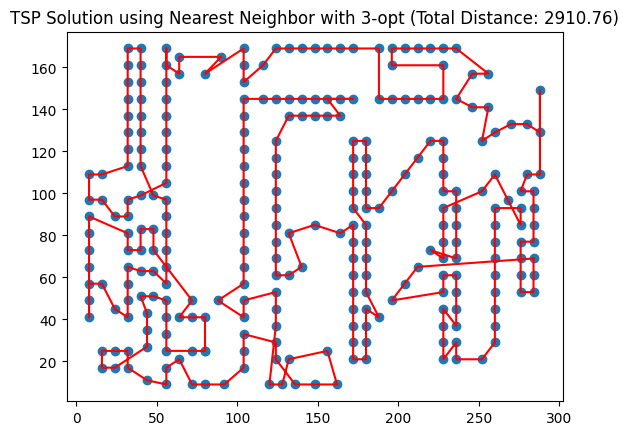

Time taken to render: 7557.305068969727 seconds


Iteration 110: Improved total distance to 3094.27
Iteration 8822: Improved total distance to 3090.68
Iteration 39183: Improved total distance to 3088.37
Iteration 1541043: Improved total distance to 3082.58
Iteration 1541105: Improved total distance to 3080.62
Iteration 1746739: Improved total distance to 3076.79
Iteration 1825281: Improved total distance to 3072.39
Iteration 1827513: Improved total distance to 3071.69
Iteration 2452507: Improved total distance to 3055.66
Iteration 2694282: Improved total distance to 3051.29
Iteration 2701677: Improved total distance to 3024.05
Iteration 4449202: Improved total distance to 3019.92
Iteration 4567809: Improved total distance to 3017.85
Iteration 5203849: Improved total distance to 3004.66
Iteration 6906579: Improved total distance to 3001.24
Iteration 7051685: Improved total distance to 3000.61
Iteration 7080993: Improved total distance to 2987.38
Iteration 7081876: Improved total distanc

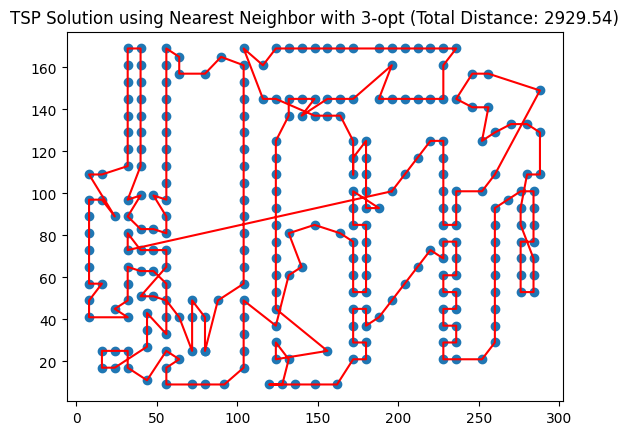

Time taken to render: 7643.060502767563 seconds


Iteration 799: Improved total distance to 3238.32
Iteration 1350: Improved total distance to 3185.10
Iteration 8682: Improved total distance to 3166.29
Iteration 530675: Improved total distance to 3155.68
Iteration 829435: Improved total distance to 3153.92
Iteration 911904: Improved total distance to 3147.22
Iteration 2470570: Improved total distance to 3139.97
Iteration 2848314: Improved total distance to 3123.06
Iteration 2909731: Improved total distance to 3108.54
Iteration 2980824: Improved total distance to 3102.92
Iteration 3260946: Improved total distance to 3097.74
Iteration 3262019: Improved total distance to 3089.40
Iteration 3269558: Improved total distance to 3086.24
Iteration 3295464: Improved total distance to 3082.88
Iteration 3301414: Improved total distance to 3072.10
Iteration 3308834: Improved total distance to 3071.66
Iteration 3312303: Improved total distance to 3068.25
Iteration 3421270: Improved total distance to

KeyboardInterrupt: 

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.search(line)
            if match:
                coordinates.append((int(match.group(1)), int(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")
